## Taller 2

Dibujar la ecuación $y(x)=x^3-3x^2+x-1$

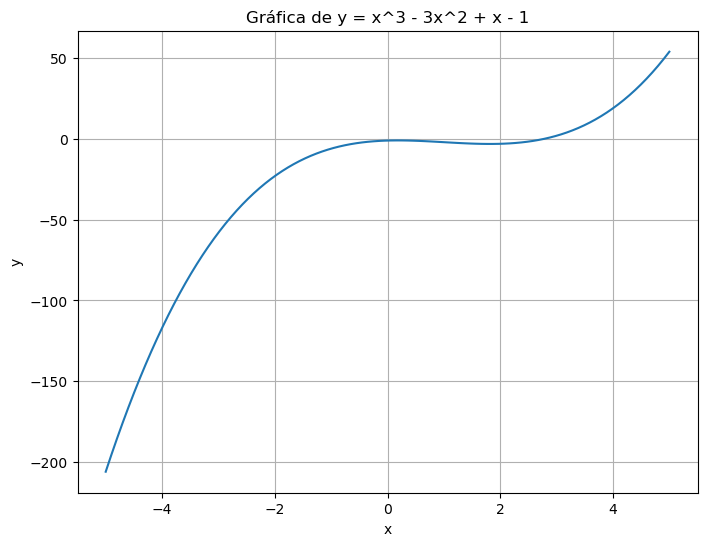

In [2]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 100)
y = x**3 - 3*x**2 + x - 1
plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de y = x^3 - 3x^2 + x - 1')
plt.grid(True)
plt.show()

Encontrar la o las raíces usando el método de Newton con Scipy

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
def f(x):
    return x**3 - 2*x - 5
def fprime(x):
    return 3*x**2 - 2
x0 = 100
root = newton(f, x0, fprime=fprime)
print("La raíz aproximada es:", root)

La raíz aproximada es: 2.0945514815423265


Retornar las estimaciones visitadas poor el algoritmo 
* Usando el parámetro args=() u otro método

Estimaciones: [10, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095, 1.4142135623730951, 1.414213562373095]


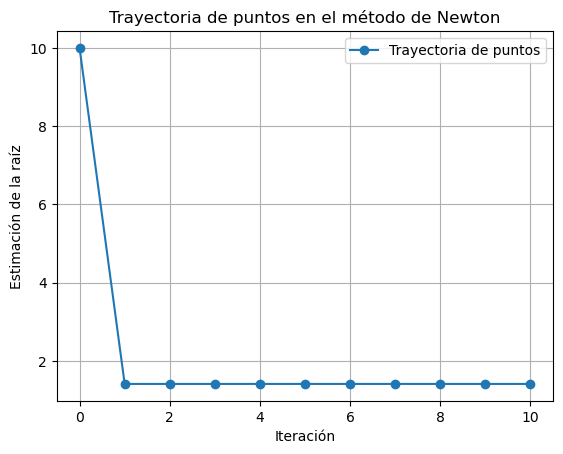

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
def f(x):
    return x**2 - 2  
def fprime(x):
    return 2 * x
def newton_registro(f, x0, fprime, maxiter):
    estimaciones = [x0]  
    for i in range(maxiter):
        x0 = newton(f, x0, fprime=fprime)
        estimaciones.append(x0)
    return estimaciones
x0 = 10  
maxiter = 10  
resultados = newton_registro(f, x0, fprime, maxiter)
print("Estimaciones:", resultados)
plt.plot(resultados, 'o-', label="Trayectoria de puntos")
plt.xlabel("Iteración")
plt.ylabel("Estimación de la raíz")
plt.title("Trayectoria de puntos en el método de Newton")
plt.legend()
plt.grid()
plt.show()


Dibujar la trayectoria de las raíces
* Pruebe 3 estimaciones iniciales diferentes

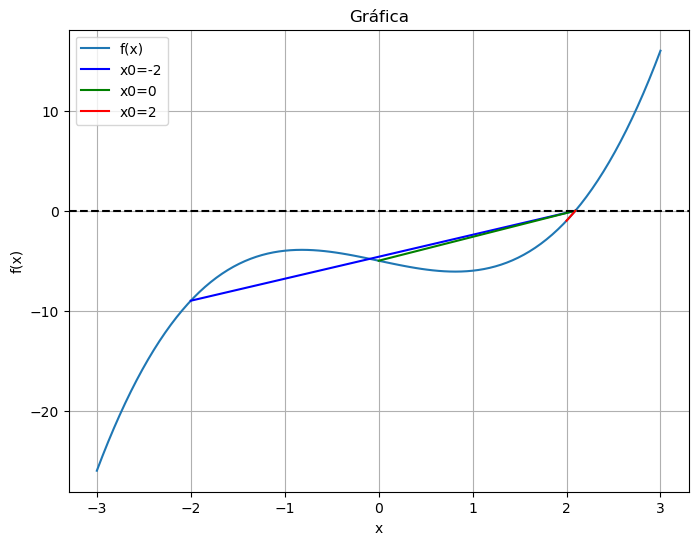

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton
def f(x):
    return x**3 - 2*x - 5
def fprime(x):
    return 3*x**2 - 2
def newton_with_tracking(f, x0, fprime, maxiter):
    x = x0
    xs = [x] 
    for _ in range(maxiter):
        x = newton(f, x, fprime=fprime)
        xs.append(x)
    return xs
x0s = [-2, 0, 2]
colors = ['blue', 'green', 'red']
plt.figure(figsize=(8, 6))
x = np.linspace(-3, 3, 100)
y = f(x)
plt.plot(x, y, label='f(x)')
for i, x0 in enumerate(x0s):
    xs = newton_with_tracking(f, x0, fprime, 10)
    plt.plot(xs, f(np.array(xs)), label=f'x0={x0}', color=colors[i])
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica')
plt.legend()
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='--')
plt.show()

¿Cómo ejecutar el código y evitar que dé error para toda estimación?

In [17]:
import numpy as np
from scipy.optimize import newton

def f(x):
    return x**2 - 4

def fprime(x):
    return 2*x

def newton_seguro(f, x0, fprime, maxiter, tol=1e-6):
    estimaciones = [x0]
    for _ in range(maxiter):
        try:
            x0 = newton(f, x0, fprime=fprime)
            estimaciones.append(x0)
            if abs(xs[-1] - xs[-2]) < tol:
                break
        except RuntimeError:
            print("Error en la iteración. Posible división por cero o no convergencia.")
            break
    return estimaciones
resultados = newton_seguro(f, 100, fprime, 10)
print(resultados)


[100, 2.0]
